<a href="https://colab.research.google.com/github/Jejes-Rosy/Flask-koyeb/blob/main/titanic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic Survival Prediction
### Exploratory Data Analysis, Preprocessing, and Modeling

In [6]:
# 2. Import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# 3. Load data
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

print("Train shape:", train_df.shape)
train_df.head()

Train shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()
train_df.describe()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


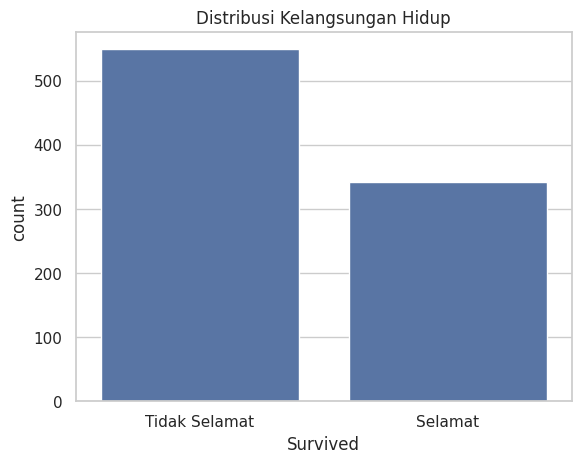

In [8]:
sns.countplot(x="Survived", data=train_df)
plt.title("Distribusi Kelangsungan Hidup")
plt.xticks([0, 1], ["Tidak Selamat", "Selamat"])
plt.show()

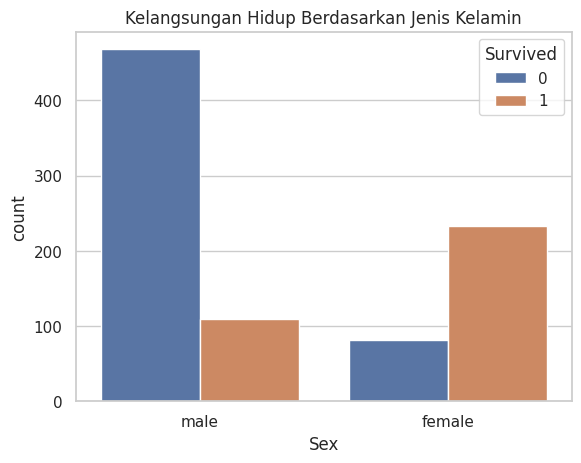

In [9]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Kelangsungan Hidup Berdasarkan Jenis Kelamin")
plt.show()



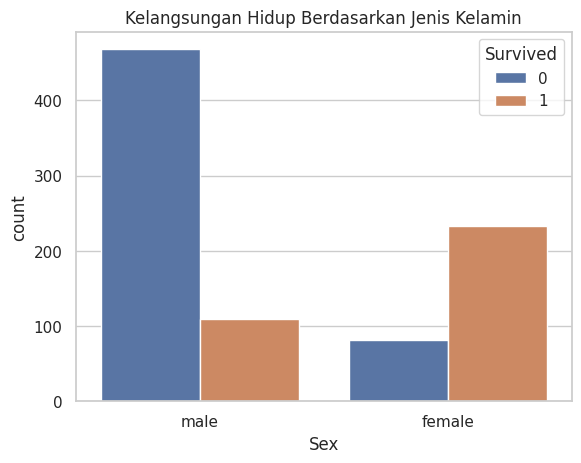

In [10]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Kelangsungan Hidup Berdasarkan Jenis Kelamin")
plt.show()


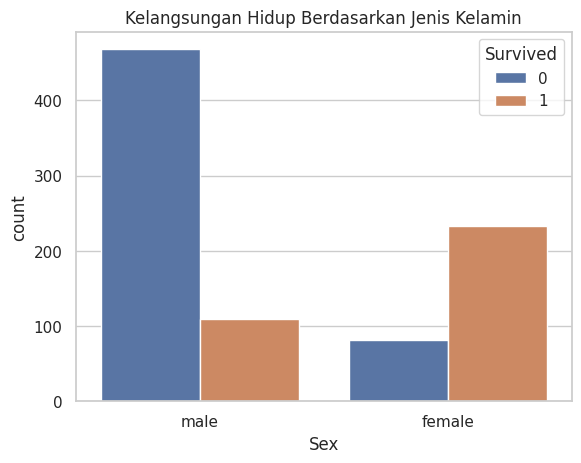

In [11]:
sns.countplot(x="Sex", hue="Survived", data=train_df)
plt.title("Kelangsungan Hidup Berdasarkan Jenis Kelamin")
plt.show()

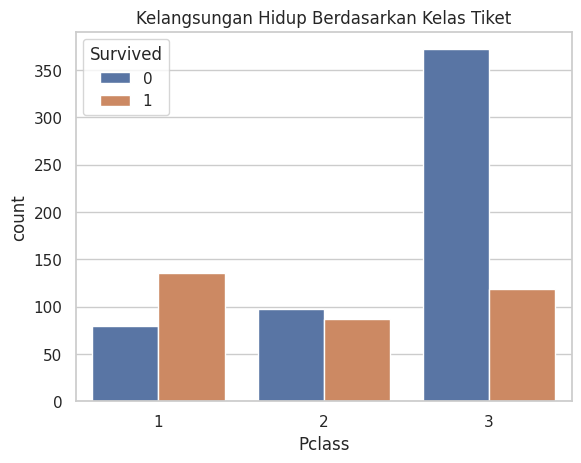

In [12]:
sns.countplot(x="Pclass", hue="Survived", data=train_df)
plt.title("Kelangsungan Hidup Berdasarkan Kelas Tiket")
plt.show()


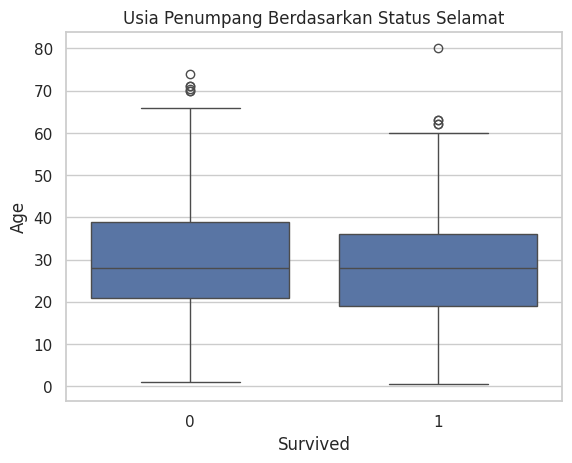

In [13]:
sns.boxplot(x="Survived", y="Age", data=train_df)
plt.title("Usia Penumpang Berdasarkan Status Selamat")
plt.show()



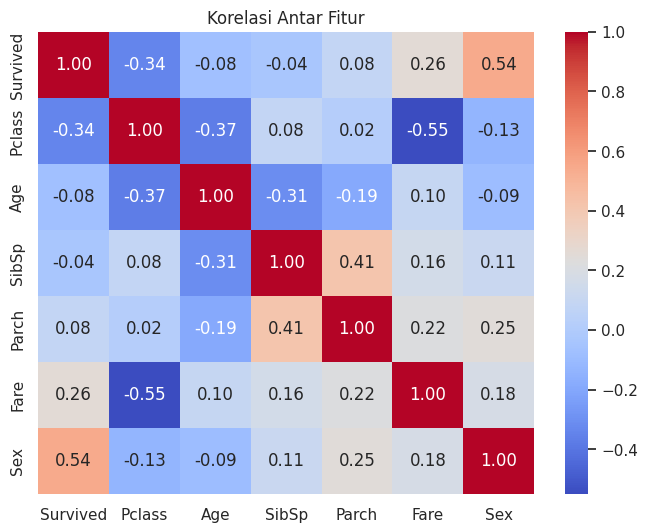

In [14]:
# Encode Sex agar bisa dihitung korelasinya
train_df_encoded = train_df.copy()
train_df_encoded["Sex"] = train_df_encoded["Sex"].map({"male": 0, "female": 1})

# Hitung korelasi hanya antar fitur numerik
corr = train_df_encoded[["Survived", "Pclass", "Age", "SibSp", "Parch", "Fare", "Sex"]].corr()

# Tampilkan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur")
plt.show()
